In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def Scaling(data):
    # Scale numeric features only
    numeric_cols = ['area','bedrooms','bathrooms','stories','parking']
    for col in numeric_cols:
        data[col] = (data[col] - data[col].mean()) / data[col].std()

    # Scale price separately
    data['price'] = (data['price'] - data['price'].mean()) / data['price'].std()
    return data

In [5]:
def cap_outliers(data):
    # IQR method to cap outliers in 'price'
    Q1 = data['price'].quantile(0.25)
    Q3 = data['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap prices at lower and upper bounds
    data['price'] = np.where(data['price'] > upper_bound, upper_bound, data['price'])
    data['price'] = np.where(data['price'] < lower_bound, lower_bound, data['price'])

    return data

In [6]:
def preprocessing(data):
    # Cap outliers first
    data = cap_outliers(data)

    # Convert yes/no columns to 0/1
    cols = ['hotwaterheating','airconditioning','prefarea','mainroad','basement','guestroom']
    for col in cols:
        data[col] = data[col].replace({'yes':1,'no':0})

    # One-hot encode categorical columns
    data = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=True)

    # Scale numeric features and price
    data = Scaling(data)
    return data

In [7]:
def calc(X, w, b):
    return np.dot(X, w) + b

In [8]:
def update_weights(w, d, lr=0.001):
    return w - lr * d

/tmp/ipython-input-2265803525.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace({'yes':1,'no':0})


Weights after training: [0.28930721122195047 0.04543014313426621 0.24937899867566243
 0.2231930511450066 0.22965690664074798 0.2053013168023436
 0.1886305737420167 0.43400146164114506 0.46967857738322155
 0.11455351038086882 0.3336192591635505 -0.019105874773175876
 -0.2412296370768229]
Bias after training: -0.45762517211565334
Predicted: 8087158.528164028 Actual: 13300000


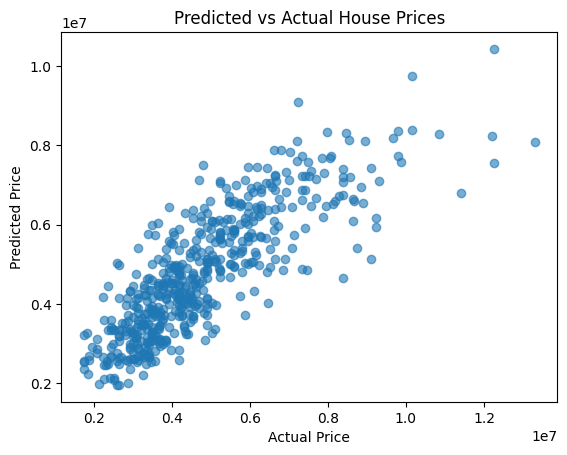

In [9]:
def main():
    data = pd.read_csv("Housing.csv")

    # Save original price stats for later rescaling
    y_og = data["price"].to_numpy()
    og_mean = np.mean(y_og)
    og_std = np.std(y_og)

    data = preprocessing(data)

    # Features
    features = [col for col in data.columns if col != 'price']
    X = data[features].to_numpy()
    Y = data['price'].to_numpy()


    # Initialize weights
    w = np.zeros(len(features))
    b = 0

    iterations = 50000
    tolerance = 1e-4
    prev_RMSE = None

    for i in range(iterations):
        y_pred = calc(X, w, b)
        error = y_pred - Y

        # Gradients (RMSE / MSE)
        dw = (X.T @ error) / len(Y)
        db = np.mean(error)

        # Update weights
        w = update_weights(w, dw)
        b = update_weights(b, db)

        # RMSE for monitoring
        RMSE = np.sqrt(np.mean(error**2))

    print(f"Weights after training: {w}")
    print(f"Bias after training: {b}")

    # Predict on scaled data
    y_pred_scaled = np.dot(X, w) + b

    # Convert predictions back to original price scale
    y_pred_original = y_pred_scaled * og_std + og_mean

    # Compare first prediction
    print("Predicted:", y_pred_original[0], "Actual:", y_og[0])

    #For Visualizing Data

    plt.scatter(y_og, y_pred_original, alpha=0.6)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title("Predicted vs Actual House Prices")
    plt.show()



main()